All provided files should be in the same folder.

### Load packages

In [204]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import pandas_profiling
import datetime
%matplotlib inline
from io import StringIO
import os
import json
import re

### Load the file

In [205]:
# we can deal with it just in the memory. Alternatively I pushed it through Databricks and uploaded the final table into a Postgresql database. 
os.chdir(r'C:\Users\us61565\Desktop\Internal\Kaggle') # use the right address here

# Reading the json as a dict
with open('sc_data_science_challenge.json') as json_data:
    data = json.load(json_data)

In [ ]:
data

### Make a dataframe

In [207]:
# Had to make everything of an equal length first 
def pad_dict_list(dict_list, padel):
    lmax = 0
    for lname in dict_list.keys():
        lmax = max(lmax, len(dict_list[lname]))
    for lname in dict_list.keys():
        ll = len(dict_list[lname])
        if  ll < lmax:
            dict_list[lname] += [padel] * (lmax - ll)
    return dict_list

In [208]:
data1 = pad_dict_list(data, 1) # using the function from above

In [209]:
df = pd.DataFrame.from_dict(data1).T

In [210]:
cols = df.T.iloc[0:15,1]  # saving columns' names
cols

0                                                ts
1                                      country_code
2                                    client_version
3                                 listening_context
4                        recommender_algorithm_name
5                                          track_id
6                              track_genre_category
7                                 track_upload_date
8                                    track_duration
9                                   listen_duration
10                                      listener_id
11                             listener_signup_date
12             listener_top_genre_category_listened
13               listener_prev_month_listening_time
14    listener_prev_month_avg_daily_tracks_listened
Name: columns, dtype: object

In [211]:
cols_2_split = df.T.iloc[0:,0] # data to split

In [212]:
# make sure seconds are good. Remove from the final
original = cols_2_split.astype(str).str.split(', ', expand = True) 

In [213]:
# remove
original.columns = cols

In [214]:
# remove
original.head()

columns,ts,country_code,client_version,listening_context,recommender_algorithm_name,track_id,track_genre_category,track_upload_date,track_duration,listen_duration,listener_id,listener_signup_date,listener_top_genre_category_listened,listener_prev_month_listening_time,listener_prev_month_avg_daily_tracks_listened
0,[1467398683,'GB','204.0.20','tracks','content-based','b47911d0e80d1a8a959a2b726654bbfa','Dance & Electronic',1466640000,413933,413933,'0001d5755511cae40e5b32d83a3decce',1324771200,'HipHop & R&B',617270940.0,22.5]
1,[1467398924,'GB','204.0.20','tracks','content-based','1f5e4bc82ba7fc802f780870f9b69191','HipHop & R&B',1466726400,402640,110722,'0001d5755511cae40e5b32d83a3decce',1324771200,'HipHop & R&B',617270940.0,22.5]
2,[1467820636,'GB','204.0.20','users','content-based','092495283958e5d00f61cf2afe970d83','Pop',1467072000,494811,193818,'0001d5755511cae40e5b32d83a3decce',1324771200,'HipHop & R&B',617270940.0,22.5]
3,[1467401951,'US','36.0.8','collection','content-based','211cd7be59941679f5ea847879b3b19b','HipHop & R&B',1402272000,361585,361585,'000264c5b34ad04999535c8b6a8b86e2',1379376000,'HipHop & R&B',112239180.0,10.5]
4,[1467402159,'US','36.0.8','collection','content-based','0e7ca1a7524aba84473540fa0d0ec75f','Pop',1448668800,373700,160162,'000264c5b34ad04999535c8b6a8b86e2',1379376000,'HipHop & R&B',112239180.0,10.5]


In [215]:
# remove
# t1 = cols_2_split.astype(str).map(lambda x: x[0]).str.rsplit(', ').str

In [216]:
df_values = cols_2_split.astype(str).str.split(', ', expand = True) 

In [217]:
# Giving names to columns
df_values.columns = cols

In [218]:
df_values.head()

columns,ts,country_code,client_version,listening_context,recommender_algorithm_name,track_id,track_genre_category,track_upload_date,track_duration,listen_duration,listener_id,listener_signup_date,listener_top_genre_category_listened,listener_prev_month_listening_time,listener_prev_month_avg_daily_tracks_listened
0,[1467398683,'GB','204.0.20','tracks','content-based','b47911d0e80d1a8a959a2b726654bbfa','Dance & Electronic',1466640000,413933,413933,'0001d5755511cae40e5b32d83a3decce',1324771200,'HipHop & R&B',617270940.0,22.5]
1,[1467398924,'GB','204.0.20','tracks','content-based','1f5e4bc82ba7fc802f780870f9b69191','HipHop & R&B',1466726400,402640,110722,'0001d5755511cae40e5b32d83a3decce',1324771200,'HipHop & R&B',617270940.0,22.5]
2,[1467820636,'GB','204.0.20','users','content-based','092495283958e5d00f61cf2afe970d83','Pop',1467072000,494811,193818,'0001d5755511cae40e5b32d83a3decce',1324771200,'HipHop & R&B',617270940.0,22.5]
3,[1467401951,'US','36.0.8','collection','content-based','211cd7be59941679f5ea847879b3b19b','HipHop & R&B',1402272000,361585,361585,'000264c5b34ad04999535c8b6a8b86e2',1379376000,'HipHop & R&B',112239180.0,10.5]
4,[1467402159,'US','36.0.8','collection','content-based','0e7ca1a7524aba84473540fa0d0ec75f','Pop',1448668800,373700,160162,'000264c5b34ad04999535c8b6a8b86e2',1379376000,'HipHop & R&B',112239180.0,10.5]


In [219]:
# test = df_values

In [220]:
# test.head()

In [221]:
df_values.head()

columns,ts,country_code,client_version,listening_context,recommender_algorithm_name,track_id,track_genre_category,track_upload_date,track_duration,listen_duration,listener_id,listener_signup_date,listener_top_genre_category_listened,listener_prev_month_listening_time,listener_prev_month_avg_daily_tracks_listened
0,[1467398683,'GB','204.0.20','tracks','content-based','b47911d0e80d1a8a959a2b726654bbfa','Dance & Electronic',1466640000,413933,413933,'0001d5755511cae40e5b32d83a3decce',1324771200,'HipHop & R&B',617270940.0,22.5]
1,[1467398924,'GB','204.0.20','tracks','content-based','1f5e4bc82ba7fc802f780870f9b69191','HipHop & R&B',1466726400,402640,110722,'0001d5755511cae40e5b32d83a3decce',1324771200,'HipHop & R&B',617270940.0,22.5]
2,[1467820636,'GB','204.0.20','users','content-based','092495283958e5d00f61cf2afe970d83','Pop',1467072000,494811,193818,'0001d5755511cae40e5b32d83a3decce',1324771200,'HipHop & R&B',617270940.0,22.5]
3,[1467401951,'US','36.0.8','collection','content-based','211cd7be59941679f5ea847879b3b19b','HipHop & R&B',1402272000,361585,361585,'000264c5b34ad04999535c8b6a8b86e2',1379376000,'HipHop & R&B',112239180.0,10.5]
4,[1467402159,'US','36.0.8','collection','content-based','0e7ca1a7524aba84473540fa0d0ec75f','Pop',1448668800,373700,160162,'000264c5b34ad04999535c8b6a8b86e2',1379376000,'HipHop & R&B',112239180.0,10.5]


### Cleaning the dataset

In [222]:
# Square brackets
df_values['ts'] = df_values['ts'].str[1:] # removing the first bracket
df_values.iloc[:,-1] = df_values.iloc[:,-1].map(lambda x: str(x)[:-1])  # don't want to type the name of the last column. Removing the bracket

In [223]:
# removing quotes
for a in df_values.iloc[:,1:7].columns.tolist():
    df_values[a] = df_values[a].astype(str).str.replace('\'', '')

for b in df_values[['listener_id','listener_top_genre_category_listened']].columns.tolist():
    df_values[b] = df_values[b].astype(str).str.replace('\'', '')    

In [224]:
# unix timestamp to date
df_values['ts'] = pd.to_datetime(df_values['ts'], unit='s')
df_values['track_upload_date'] = pd.to_datetime(df_values['track_upload_date'], unit='s')
df_values['listener_signup_date'] = pd.to_datetime(df_values['listener_signup_date'], unit='s')

In [225]:
# Milliseconds to seconds for now
df_values['track_duration'] = df_values['track_duration'].astype(float)/1000
df_values['listen_duration'] = df_values['listen_duration'].astype(float)/1000

In [244]:
"""The above approach won't work with listener_prev_month_listening_time because it has a non-numeric value for customers who are 
first month users. Here is a work-around"""

df_values['listener_prev_month_listening_time'] = pd.to_numeric(df_values['listener_prev_month_listening_time'], errors='ignore')
df_values['listener_prev_month_listening_time'].replace(to_replace=['None'], value=np.nan, inplace=True)
df_values['listener_prev_month_listening_time'].fillna(0, inplace = True)
df_values['listener_prev_month_listening_time'] = df_values['listener_prev_month_listening_time'].astype(float)/1000

In [247]:
# let's check the NaN situation
df_values[df_values.isnull().any(axis=1)]

columns,ts,country_code,client_version,listening_context,recommender_algorithm_name,track_id,track_genre_category,track_upload_date,track_duration,listen_duration,listener_id,listener_signup_date,listener_top_genre_category_listened,listener_prev_month_listening_time,listener_prev_month_avg_daily_tracks_listened


In [248]:
df_values.dtypes

columns
ts                                               datetime64[ns]
country_code                                             object
client_version                                           object
listening_context                                        object
recommender_algorithm_name                               object
track_id                                                 object
track_genre_category                                     object
track_upload_date                                datetime64[ns]
track_duration                                          float64
listen_duration                                         float64
listener_id                                              object
listener_signup_date                             datetime64[ns]
listener_top_genre_category_listened                     object
listener_prev_month_listening_time                      float64
listener_prev_month_avg_daily_tracks_listened            object
dtype: object

In [ ]:
# writing a .csv
# df_values.to_csv(r'C:\Users\us61565\Desktop\Internal\Kaggle\df_values.csv', index=False)

## Descriptive Analysis

Seems it's much easier to take a first look using Tableau b/c of numerous small things that can be handled by using Fixed in Tableau but require way more work in Python. 

First we need to define what a skipped track is. We need to fix Track Id b/c the same track can be listened by different users and more than once. If we just take the difference all ratios will go > 100%


<img src="skip_track_def.jpg">

Let's see whether 'old' and 'new' users are different:

<img src = "skipped_by_year.jpg">

It's been fairly steady. But are they all active?
To understand that, we can 

Maybe the user count and how much they listened deteriorated and led to a wash?

Then we move to assessing how every dimension (or a feature) influences 

Let's try find what features are more important. For this, we can use either a random forest or XgBoost.

We want a dataset with columns: 
colnames = ['Country Code','Listener Id','listener_prev_month_avg_daily_tracks_listened','listening_context',
         'recommender_algorithm_name','Skipped','track_genre_category','track_id','Last time minus track date','User Age']

It requires a lot of groupby and merge: it's done below. 
But it was much faster to create the required dataset in Tableau, export to .mdb, export to .txt and clean up this .txt right here

In [310]:
colnames = ['Country Code','Listener Id','listener_prev_month_avg_daily_tracks_listened','listening_context',
         'recommender_algorithm_name','Skipped','track_genre_category','track_id','Last time minus track date','User Age']
df_ml = pd.read_csv(r'C:\Users\us61565\Desktop\Internal\Kaggle\df_fr_access.txt', sep=",", names = colnames, header = None)


A few words about last time minus track date. It's calculated as such:

<img src = "last time minus track date.JPG">

Where one variable is given and another one is:

<img src = "last time user listened.jpg">

Apparently it's all zeroes, and it sems that every user's last song was recommended. A hypothesis was that users might come back without recs b/c they love the service, etc. It still seems logical, but I cannot prove in this dataset. So I removed the column.

In [312]:
df_ml.drop(columns=['Last time minus track date'], inplace = True)

We can also drop Listener Id and track_id

In [314]:
df_ml.drop(columns=['Listener Id','track_id'], inplace = True)

In [315]:
df_ml.head()

,Country Code,listener_prev_month_avg_daily_tracks_listened,listening_context,recommender_algorithm_name,Skipped,track_genre_category,User Age
0,GB,48.0,tracks,content-based,Y,Dance & Electronic,1952
1,US,18.0,tracks,collaborative,Y,Dance & Electronic,2404
2,US,22.5,collection,content-based,Y,HipHop & R&B,490
3,US,40.5,tracks,content-based,Y,Dance & Electronic,908
4,GB,81.0,tracks,content-based,Y,Dance & Electronic,315


**Scroll below to "A bit of ML"**

#### If you want to create new fields manually here:

In [ ]:
df_values.head()

In [ ]:
by_listener = df_values.groupby(['listener_id'])
by_listener.first()

In [257]:
# Users' time on the platform
age = df_values.groupby('listener_id')['ts'].max() - df_values.groupby('listener_id')['listener_signup_date'].min()

In [260]:
# adding this column
result_w_age = df_values.merge(age.to_frame(), on='listener_id')

In [ ]:
result_w_age.head()

In [265]:
#renaming the added column
result_w_age.rename(columns={ result_w_age.columns[-1]: "listener_age"}, inplace = True)

In [272]:
# df_l_tr = result_w_age.groupby(['listener_id','track_id'])

In [ ]:
# df_l_tr['Skipped'] = np.where(df_l_tr['listen_duration'] - df_l_tr['track_duration'] < 0, 'Yes', 'No')

#  df.groupby('A').apply(lambda x: (x['C'] - x['D']))
# age = result_w_age.groupby(['listener_id','track_id']).apply(lambda x: (x['listen_duration']-x['track_duration']))   

In [283]:
# difference between tracks' lengths and how much was listened
result_w_diff = result_w_age.merge(result_w_age.groupby(['listener_id','track_id']).apply(lambda x: (x['listen_duration']-x['track_duration'])).to_frame(), on=['listener_id','track_id'])

In [ ]:
#renaming the added column
result_w_diff.rename(columns={ result_w_diff.columns[-1]: "for_skipped"}, inplace = True)

In [ ]:
result_w_diff.head()

In [302]:
# Creating a skipped column
result_w_diff['skipped'] = np.where(result_w_diff['for_skipped']< 0, 'Yes', 'No')

### A bit of ML

In [316]:
import xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [317]:
dataset = df_ml.values

In [322]:
# I need to add to X all but one column. I didn't want to type their names...
columns = df_ml.columns
mask = np.ones(columns.shape, dtype=bool)
i = 4
mask[i] = 0
X = df_ml[columns[mask]]

In [340]:
X.dtypes

Country Code                                      object
listener_prev_month_avg_daily_tracks_listened    float64
listening_context                                 object
recommender_algorithm_name                        object
track_genre_category                              object
User Age                                           int64
dtype: object

In [324]:
Y = df_ml['Skipped']

In [ ]:
# # encode string input values as integers
# encoded_x = None
# for i in range(0, X.shape[1]):
#     label_encoder = LabelEncoder()
#     feature = label_encoder.fit_transform(X.iloc[:,i])
#     feature = feature.reshape(X.shape[0], 1)
#     onehot_encoder = OneHotEncoder(sparse=False)
#     feature = onehot_encoder.fit_transform(feature)
#     if encoded_x is None:
#         encoded_x = feature
#     else:
#         encoded_x = numpy.concatenate((encoded_x, feature), axis=1)
# print("X shape: : ", encoded_x.shape)

In [ ]:
# onehot_encoder = OneHotEncoder(sparse=False)
# # df.select_dtypes(include=['int'])
# feature = onehot_encoder.fit_transform(X.select_dtypes(include=['object']))

In [336]:
X_enc = pd.get_dummies(X, prefix_sep='_', drop_first=True)

In [378]:
X_enc.columns.tolist()

['listener_prev_month_avg_daily_tracks_listened',
 'User Age',
 'Country Code_US',
 'Country Code_`',
 'listening_context_collection',
 'listening_context_personal-recommended',
 'listening_context_playlists',
 'listening_context_search',
 'listening_context_stream',
 'listening_context_tracks',
 'listening_context_users',
 'listening_context_you',
 'recommender_algorithm_name_content-based',
 'recommender_algorithm_name_fallback',
 'recommender_algorithm_name_hybrid',
 'track_genre_category_Country',
 'track_genre_category_Dance & Electronic',
 'track_genre_category_HipHop & R&B',
 'track_genre_category_Jazz',
 'track_genre_category_Latin',
 'track_genre_category_Metal',
 'track_genre_category_Pop',
 'track_genre_category_Reggae',
 'track_genre_category_Rock',
 'track_genre_category_Speech',
 'track_genre_category_Unknown',
 'track_genre_category_World']

In [349]:
# combine X_enc and numerical columns
fully_encoded_x = np.concatenate((X.select_dtypes(exclude=['object']), X_enc), axis = 1)

In [385]:
X.select_dtypes(exclude=['object']).columns.tolist() + X_enc.columns.tolist()

['listener_prev_month_avg_daily_tracks_listened',
 'User Age',
 'listener_prev_month_avg_daily_tracks_listened',
 'User Age',
 'Country Code_US',
 'Country Code_`',
 'listening_context_collection',
 'listening_context_personal-recommended',
 'listening_context_playlists',
 'listening_context_search',
 'listening_context_stream',
 'listening_context_tracks',
 'listening_context_users',
 'listening_context_you',
 'recommender_algorithm_name_content-based',
 'recommender_algorithm_name_fallback',
 'recommender_algorithm_name_hybrid',
 'track_genre_category_Country',
 'track_genre_category_Dance & Electronic',
 'track_genre_category_HipHop & R&B',
 'track_genre_category_Jazz',
 'track_genre_category_Latin',
 'track_genre_category_Metal',
 'track_genre_category_Pop',
 'track_genre_category_Reggae',
 'track_genre_category_Rock',
 'track_genre_category_Speech',
 'track_genre_category_Unknown',
 'track_genre_category_World']

In [380]:
fully_encoded_x.columns.tolist()

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [338]:
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(Y)
label_encoded_y = label_encoder.transform(Y)

In [351]:
X_train, X_test, y_train, y_test = train_test_split(fully_encoded_x, label_encoded_y, test_size=0.3, random_state=43)

In [366]:
fully_encoded_x

array([[  48. , 1952. ,   48. , ...,    0. ,    0. ,    0. ],
       [  18. , 2404. ,   18. , ...,    0. ,    0. ,    0. ],
       [  22.5,  490. ,   22.5, ...,    0. ,    0. ,    0. ],
       ...,
       [   4.5,  606. ,    4.5, ...,    0. ,    0. ,    0. ],
       [   4.5, 1212. ,    4.5, ...,    0. ,    0. ,    0. ],
       [   4.5,  606. ,    4.5, ...,    0. ,    0. ,    0. ]])

In [352]:
model = XGBClassifier()
model.fit(X_train, y_train)
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [353]:
y_pred = model.predict(X_test)

In [354]:
predictions = [round(value) for value in y_pred]

In [355]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 70.57%


In [365]:
X_train

array([[  25.5,  819. ,   25.5, ...,    0. ,    0. ,    0. ],
       [  33. , 1426. ,   33. , ...,    0. ,    0. ,    0. ],
       [  12. ,  276. ,   12. , ...,    0. ,    0. ,    0. ],
       ...,
       [  10.5,  648. ,   10.5, ...,    0. ,    0. ,    0. ],
       [   nan, 3424. ,    nan, ...,    0. ,    0. ,    0. ],
       [   nan,  882. ,    nan, ...,    0. ,    0. ,    0. ]])

([<matplotlib.axis.XTick at 0x227bd7438>,
 <a list of 29 Text xticklabel objects>)

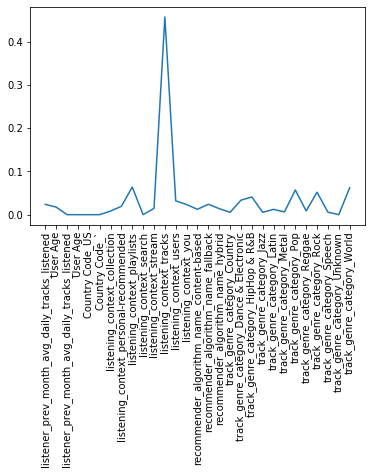

In [386]:
# sorted_idx = np.argsort(model.feature_importances_)[::-1]
# for index in sorted_idx:
#     print([X_train.columns[index], model.feature_importances_[index]]) 
# model.feature_importances_
plt.plot(model.feature_importances_)
plt.xticks(np.arange(X_train.shape[1]), X.select_dtypes(exclude=['object']).columns.tolist() + X_enc.columns.tolist(), rotation=90)

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import graphviz

In [ ]:
data_dmatrix = xgb.DMatrix(data=X_train_std,label=y_train)

In [ ]:
xg_reg = xgb.XGBRegressor(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.05,
                max_depth = 8, alpha = 10, n_estimators = 20)

In [ ]:
eval_set = [(X_test_std, y_test)]
xg_reg.fit(X_train_std, y_train, eval_metric="error", eval_set = eval_set, verbose = True)
prediction_y_5 = xg_reg.predict(X_test_std)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, prediction_y_5))
print("RMSE: %f" % (rmse))

In [ ]:
# we can do feature importance using XGBoost, as well 
list(zip(features.columns, xg_reg.feature_importances_))

In [ ]:
# cleaning columns from brackets, quotes, etc.
# df['result'] = df['result'].str.replace(r'\D', '')
# df_values['ts'] = df_values['ts'].str.replace(r'[','')
# df_values['ts'] = df_values['ts'].str[1:] # removing the first bracket
# df_values.iloc[:,-1] = df_values.iloc[:,-1].map(lambda x: str(x)[:-1])  # don't want to type the name of the last column. Removing the bracket
# df_values['country_code'].apply(lambda s: s.str.replace('\'', ''))
# df_values['client_version'].apply(lambda s: s.str.replace('\'', ''))
# df_values['listening_context'].apply(lambda s: s.str.replace('\'', ''))
# df_values['listening_context'].apply(lambda s: s.str.replace('\'', ''))
# df_values['listening_context'].apply(lambda s: s.str.replace('\'', ''))

In [ ]:
# test['country_code'].apply(lambda s: s.str.replace('\'', ''))
# test['country_code'].astype(str).str.replace('\'', '')

In [ ]:
# removing brackets:
# test['ts'] = test['ts'].str[1:]
# test.iloc[:,-1] = test.iloc[:,-1].map(lambda x: str(x)[:-1])  # don't want to type the name of the last column. Removing the bracket


# # removing quotes
# for a in test.iloc[:,1:7].columns.tolist():
#     test[a] = test[a].astype(str).str.replace('\'', '')

# for b in test[['listener_id','listener_top_genre_category_listened']].columns.tolist():
#     test[b] = test[b].astype(str).str.replace('\'', '')    


In [ ]:
# unix timestamp to date
# test['ts'] = pd.to_datetime(test['ts'], unit='s')
# test['track_upload_date'] = pd.to_datetime(test['track_upload_date'], unit='s')
# test['listener_signup_date'] = pd.to_datetime(test['listener_signup_date'], unit='s')


In [ ]:
# converting milliseconds to seconds for now
# test['track_duration'] = test['track_duration'].astype(float)/1000
# test['listen_duration'] = test['listen_duration'].astype(float)/1000
# test['listener_prev_month_listening_time'] = test['listener_prev_month_listening_time'].astype(float)/1000

In [ ]:
# test['listener_prev_month_listening_time'].astype(str).applymap(lambda x: isinstance(x, (int, float)))
# test['listener_prev_month_listening_time'] = test['listener_prev_month_listening_time'].astype(str)

In [ ]:
# test['listener_prev_month_listening_time'].astype(str).apply(lambda x: isinstance(x, (str)))

In [ ]:
# test['listener_prev_month_listening_time']

In [ ]:
# test.head()

In [ ]:
# patterns= [r'\D+'] # non integers
# # for p in patterns:
# #     match=  re.findall(p, test['listener_prev_month_listening_time'])
# #     print(match)

# # test['listener_prev_month_listening_time'].str.contains(patterns, regex=True)
# # test['listener_prev_month_listening_time'] = df_values['listener_prev_month_listening_time']
# test['listener_prev_month_listening_time'] = pd.to_numeric(test['listener_prev_month_listening_time'], errors='ignore')
# test['listener_prev_month_listening_time'].fillna(0, inplace = True)
# # test['listener_prev_month_listening_time'].apply(lambda x: any(pd.Series(x).str.contains(patterns)))

In [ ]:
# test[test.isnull().any(axis=1)]